# How is housing prices affected by population, income, and proximity to the ocean?

March 3, 2023
ECO225 project
Riko Matsushita

# 1. Project One

## 1.1 Introduction

There are many factors people consider when choosing a place to live. These are economic and financial determinants as well as demographic indicators to determine housing prices. In order to analyze all three aspects of the determinants, how housing prices are affected by income, population, and location will be examined in this project. Median house prices for California districts derived from the 1990 census, which is from https://www.kaggle.com/datasets/camnugent/california-housing-prices
will be used as a dataset to examine the relationships described above. 

For this study, the primary independent variable will be the median income. The second independent variable is the population, and the third will be proximity to the sea. I chose them as independent variables because first, demographic situation in the area is influential. Second, a balance between household income and housing prices is necessary to ensure financial security. Lastly, people often consider the natural scenery to make the place to be desirable and there is a possibility that the price will be different according to the distance from the house to the ocean. The dependent variable will be the median house value for households within a block, to similarly compare the independent variable directly to the housing prices local to each area.

In addtion to that, I focused more on the location and see how housing prices vary in relation to whether it is in a metropolitan area or not. 

To briefly summarize the findings of the project, thorough several mergin of datasets and a webscraping, I found that there is indeed interesting correlations between income and house value, and between ocean proximity and house value, and whether it is in a metropolitan area or not can affect the house value. 

## 1.2 Data Cleaning/ Loading

For data cleaning, I will make a dateframe with only necessary variabels, which are population, median income, the proximity to the ocean, median house value.

In [432]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
import os

In [433]:
#This the dataset for Califronia Housing Prices
raw_house = pd.read_csv("/Users/matsushitariko/Desktop/ECO225/Project 1/housing.csv") 
raw_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [434]:
#drop unnesessary columns
df_house = raw_house.drop(['housing_median_age', 'total_rooms', 'households',
                          'total_bedrooms'], axis=1)
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,3.8462,342200.0,NEAR BAY


Next, I am going to create dummy variables for the ocean_proximity. 

In [435]:
set(df_house['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

The above shows all the variables for the ocean_proximity column. I am going to assign “NEAR OCEAN”, “NEAR BAY”, “ISLAND” to 2 indicating that these are near the ocean, “<1H OCEAN” to 1 as the place relatively close to the ocean, and “INLAND” to 0 as being far from the ocean. 

In [436]:
ocean = {'NEAR OCEAN': 2, 'NEAR BAY': 2, 'ISLAND' : 2, '<1H OCEAN': 1, 'INLAND':0}
df_house["ocean_proximity"] = df_house["ocean_proximity"].map(ocean)
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,2
1,-122.22,37.86,2401.0,8.3014,358500.0,2
2,-122.24,37.85,496.0,7.2574,352100.0,2
3,-122.25,37.85,558.0,5.6431,341300.0,2
4,-122.25,37.85,565.0,3.8462,342200.0,2


Next, I will make another column called “ocean_proximity2”, which shows how close to the ocean the block is by the words “very close”, ”close”, and “far”.

In [437]:
df_house.loc[df_house['ocean_proximity'] == 2, 'ocean_proximity2'] = 'very close'
df_house.loc[df_house['ocean_proximity'] == 1, 'ocean_proximity2'] = 'close'
df_house.loc[df_house['ocean_proximity'] == 0, 'ocean_proximity2'] = 'far'
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close


## 1.3 Summary Statitics Tables 
Here is the summary statistics for X variabels(independent variable) and Y(dependent variable). 

In [438]:
important = ['median_income', 'population', 'median_house_value', 'ocean_proximity']
df_house_sum = df_house[important]

In [439]:
a = df_house_sum.describe()
a.round (decimals = 2)

,median_income,population,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00
mean,3.87,1425.48,206855.82,0.92
std,1.90,1132.46,115395.62,0.74
min,0.50,3.00,14999.00,0.00
25%,2.56,787.00,119600.00,0.00
50%,3.53,1166.00,179700.00,1.00
75%,4.74,1725.00,264725.00,1.00
max,15.00,35682.00,500001.00,2.00


As the table above shows, there is an extreme value at the maximum value of the population column. Thus, there might be some outliers in population, so I am going to remove them. 

In [440]:
#Remove the outliers
for x in ['population']:
    q75,q25 = np.percentile(df_house.loc[:,x],[75,25])  
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr) 
    min = q25-(1.5*intr_qr)
    
    df_house.loc[df_house[x] < min,x] = np.nan 
    df_house.loc[df_house[x] > max,x] = np.nan

Then, I will again show the summary statistics for X variables (independent variable) and Y(dependent variable).

In [441]:
important = ['median_income', 'population', 'median_house_value', 'ocean_proximity']
df_house_sum = df_house[important]

In [442]:
columnnames = {'median_income': 'Median Income',
               'population': 'Population',
               'median_house_value': 'Median House Value',
               'ocean_proximity': 'Ocean Proximity',
               'average_household_size': 'Average Household Size'}

df_house_sum = df_house_sum.rename(columns=columnnames)

In [443]:
a = df_house_sum.describe()
a.round (decimals = 2)

,Median Income,Population,Median House Value,Ocean Proximity
count,20640.00,19444.00,20640.00,20640.00
mean,3.87,1226.55,206855.82,0.92
std,1.90,641.66,115395.62,0.74
min,0.50,3.00,14999.00,0.00
25%,2.56,767.00,119600.00,0.00
50%,3.53,1121.00,179700.00,1.00
75%,4.74,1596.00,264725.00,1.00
max,15.00,3132.00,500001.00,2.00


As for median income, the mean is 38,700 dollars, whereas the maximum value is 150,000 dollars. There is a wide gap between the mean and the maximum value. When looking at the median housing value, the mean is 206855.82 dollars. Again, the gap between the mean and the maximum value is large. In addition, as for median income and median house value, the mean is much larger than the median (50%), therefore it is expected that these two distributions are positively skewed. From these facts, the two distributions are very similar and there might a positive relation between median income and median housing value. As for population, the mean of the population is 1226.55. There isn’t a large gap between the median and mean. The interval from the minimum value to the median is larger than the one from the median to the maximum value, so this can also be expected to have a positively skewed distribution .Lastly, the mean of the ocean proximity is 0.92. As we set 0 as far from the ocean, 1 as close to the ocean and 2 as very close to the ocean, the mean shows that more houses are either close to or far from the ocean than very close to the ocean. 

## 1.4 Plots, Histograms, Figures

First, we are going to see the histogram of each variable.

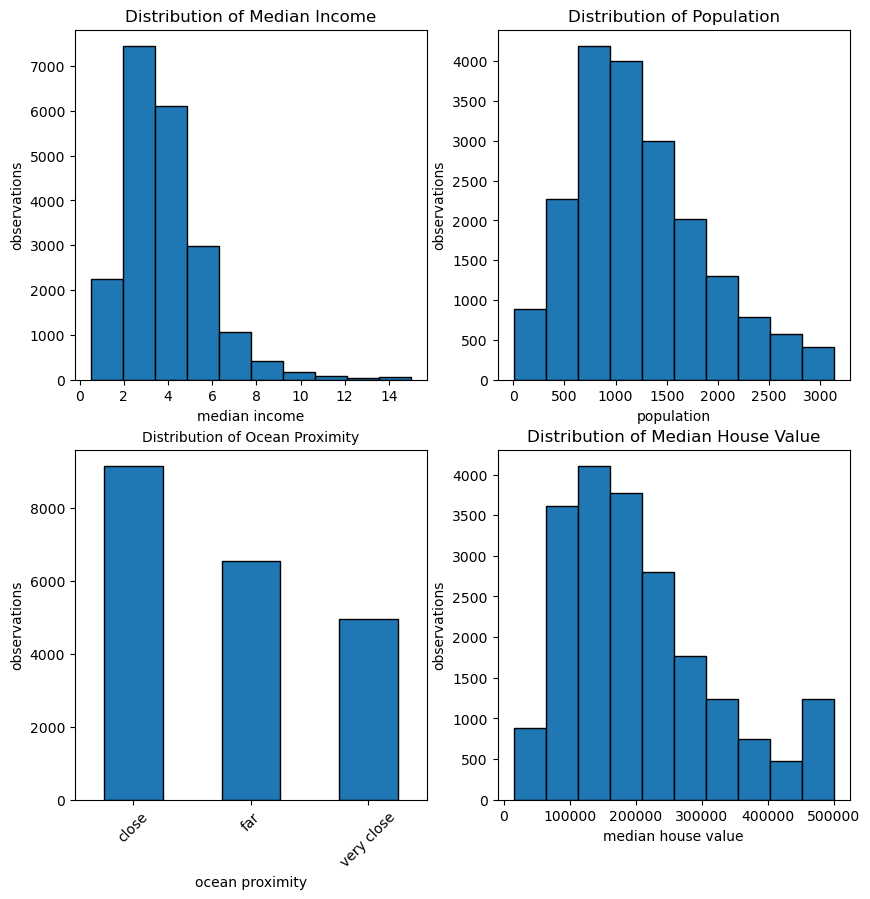

In [444]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(df_house['median_income'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Median Income')
ax.set_xlabel('median income', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10)

ax = axes[0,1]
ax.hist(df_house['population'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Population')
ax.set_xlabel('population', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10)

ax = axes[1,0]
df_house['ocean_proximity2'].value_counts().plot(kind = 'bar', ax = ax, edgecolor = 'black')
ax.set_title('Distribution of Ocean Proximity', fontsize = 10)
ax.set_xlabel('ocean proximity', fontsize = 10)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('observations', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = axes[1,1]
ax.hist(df_house['median_house_value'], edgecolor = 'black')
ax.grid(False)
ax.set_title('Distribution of Median House Value')
ax.set_xlabel('median house value', fontsize = 10)
ax.set_ylabel('observations', fontsize = 10);


The graph about the distribution of median income shows that most people’s income in this dataset falls within 2 to 6 (20,000 to 60,000 dollars). The distribution is positively skewed, and the mode is around 2 to 3.5 (20,000 to 35,000 dollars). This graph shows that most people’s income in this dataset falls within 2 to 6 (20,000 to 60,000 dollars). The distribution is positively skewed, and the mode is around 2 to 3.5 (20,000 to 35,000 dollars). I assume this type of skewness occurs because the gap between the poor the wealthy in the United States is quite large, and also the majority is dominated by poor and the middle class whereas the extremely wealthy people are minority. 

The plot of the distribution of population shows that there are more houses close to the ocean than those far from it or very close to it. Therefore, the mode is “close”. In other words, many houses in California are located in places that are close to the ocean but in those places houses that are located right in front of the ocean are few, and places that are far from the ocean is much more dispersed with houses. Again, the relation between average household size and median house value is still unknown.

The plot of the distribution of ocean proximity shows that the distribution of the population is positively skewed, where the mode is around 700. Despite the fact that it is a little skewed, it is almost evenly distributed, and the observation is the highest near the centre, therefore it can be said that the population is not dispersed a lot throughout the blocks in California. 

For the distribution of median house value, the range of housing value is wide, but many are within the range of 100000 to 200000. The distribution is positively skewed, and the mode is around 150,000. The characteristic of this distribution is very similar to that of median income, so it might be that the income is one of the biggest determining factors of house selection and that is why this type of skewness also occurs in median house value.

Next, we are going to see the relation between housing value and each dependant variable. 

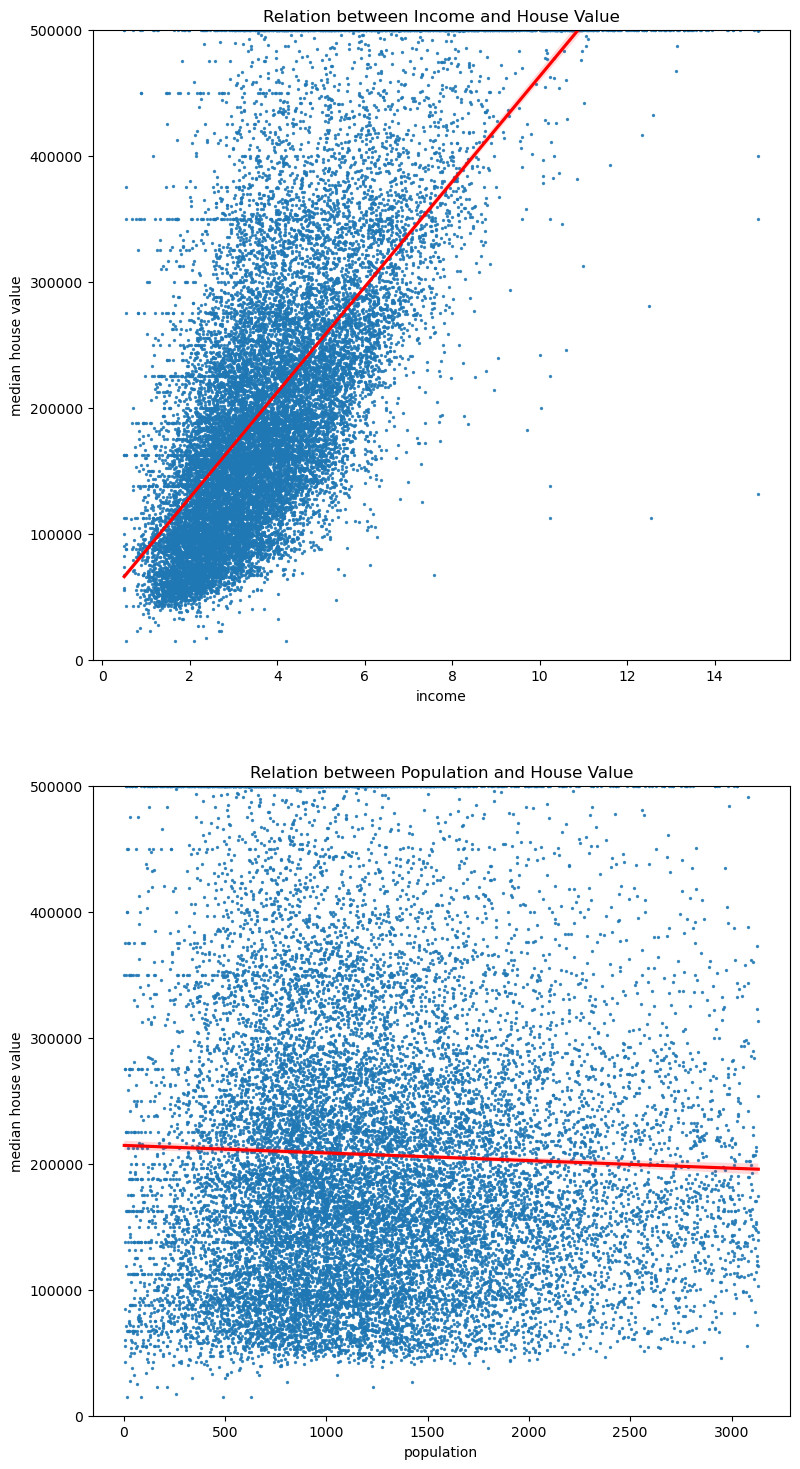

In [445]:
fig, axes = plt.subplots(2, 1, figsize=(9, 18))

ax = axes[0]
sns.regplot(x=df_house["median_income"], y=df_house["median_house_value"], scatter_kws={"s": 2}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Income and House Value')
ax.set_ylim(0, 500000)
ax.set_xlabel('income', fontsize = 10)
ax.set_ylabel('median house value', fontsize = 10)

ax = axes[1]
sns.regplot(x=df_house["population"], y=df_house["median_house_value"], scatter_kws={"s": 2}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Population and House Value')
ax.set_ylim(0, 500000)
ax.set_xlabel('population', fontsize = 10)
ax.set_ylabel('median house value', fontsize = 10);


There is a positive correlation between income and housing value. Therefore, as I argued in the histogram section, it is highly likely that income is one of the factors that affect housing value. In addition, when using a correlation method, it is clear that the correlation between median income and median house value is 0.688, which is more significant than any other correlation between other values.

However, I couldn’t see a correlation between population and median house value. Therefore, it is expected that the population doesn’t have an impact on the housing value in the block. 

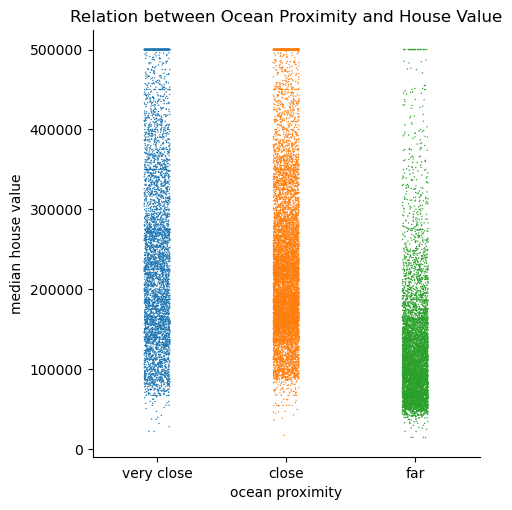

In [446]:
#Scatter plot of a relation between median house value and ocean proximity  
sns.catplot(x='ocean_proximity2', y = 'median_house_value', data = df_house, s =1)
plt.title('Relation between Ocean Proximity and House Value')
plt.xlabel('ocean proximity', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
plt.show()

I could not see the differences in house value between the blocks that are very close to the ocean house value and those that are relatively close to the ocean. However, it is clear that housing value tends to be lower when blocks are far from the ocean. Again, the location, which is ocean proximity in this case affects house value.

In [447]:
#showing the correaltion between variabels
df_house_sum.corr()

,Median Income,Population,Median House Value,Ocean Proximity
Median Income,1.000000,-0.030229,0.688075,0.184784
Population,-0.030229,1.000000,-0.033200,0.008293
Median House Value,0.688075,-0.033200,1.000000,0.436212
Ocean Proximity,0.184784,0.008293,0.436212,1.000000


There are positive correlations between income and housing value and between ocean proximity and housing value. The correlation method shows the correlation between median income and median house value is 0.688, and the correlation between ocean proximity and median house value is 0.436, both of which can be considered significant. As for population, the correlation value between population and median house value is -0.033, which is not significant since it is almost 0. 

# 2. Project Two

## 2.1 The Message

From project 1, it is obvious that there are positive correlations between median income and median house value and ocean proximity and median house value, and there is no correlation between population and median house value. Also, the income effect seems to be stronger than any other X variables I used. In order to support these findings, I will plot the relationships between ‘median house value’ and ‘income’ by subgroups 'ocean proximity’ and ‘population’. 

## 2.2 Maps and Interpretations

In [448]:
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


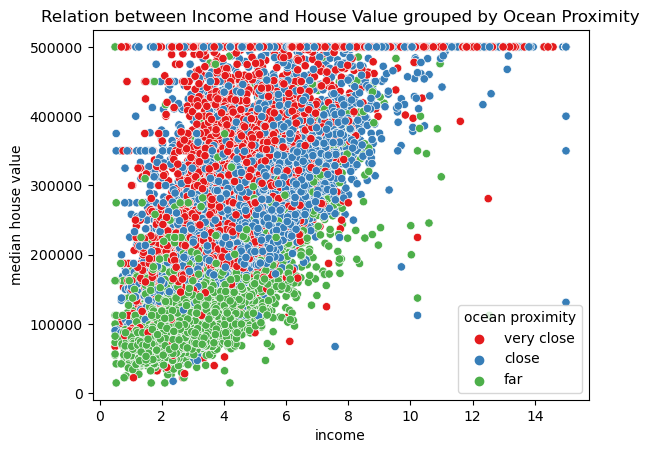

In [449]:
x = df_house['median_income']
y = df_house['median_house_value']
subgroup = df_house['ocean_proximity2']

sns.scatterplot(x, y, hue = subgroup, palette='Set1')

plt.title('Relation between Income and House Value grouped by Ocean Proximity')
plt.xlabel('income', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
legend = plt.legend()
legend.set_title('ocean proximity');

From this graph, you can not only see there is a positive correlation between income and median house value but also see that the median house value is higher when the house is close to the ocean. It also shows that people who live closer to the ocean have higher incomes. 

In order to plot a graph of the relationships between ‘median house value’ and ‘income’ by a subgroup population, I will divide the population into two groups which are higher than the median and lower than the median. 

In [450]:
median_pop = df_house['population'].median()
median_pop

1121.0

In [451]:
df_house = df_house.copy()

# create a new column in df_house called pop_HL
# classify blocks at or above the median as High
df_house.loc[df_house['population'] >= median_pop, 'pop_HL'] = 'High'
df_house.loc[df_house['population'] < median_pop, 'pop_HL'] = 'Low'

df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


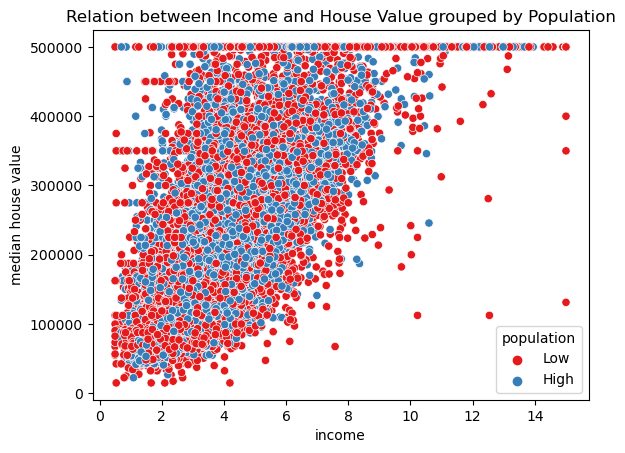

In [452]:
x = df_house['median_income']
y = df_house['median_house_value']
subgroup = df_house['pop_HL']

sns.scatterplot(x, y, hue = subgroup, palette='Set1')

plt.title('Relation between Income and House Value grouped by Population')
plt.xlabel('income', fontsize = 10)
plt.ylabel('median house value', fontsize = 10)
legend = plt.legend()
legend.set_title('population');

As you can see from the graph, there is no specific pattern that the blue and the red is distributed. Therefore, whether the population is high or low doesn’t affect the median house value. 

Of all the independent variables, I found that income is much more correlated to housing value than any other independent variable. I am going to plot a map for housing value and one for income on a county level. The purpose of making the two maps is to see if there is a similarity in the pattern between the distribution of house value and income and also to inspect the balance between household income and housing prices by for example, seeing if people that earn twice as much income spend twice as much on a house, or less than twice as much on a house. 

In [453]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds

In [454]:
#extract state information
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip") 
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [455]:
#This is county information
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip") 
CA_county = county_df.query("STATEFP == '06'") #Califormnia FIPS is 06
CA_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
33,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303..."
84,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5..."
169,06,069,00277299,0500000US06069,06069,San Benito,06,3596755292,4555000,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."
170,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7..."
200,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9..."


In [456]:
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low


On order to map the counties, we need tuples of coordinates. We genereate them by zipping the latitude and longitude together to store them in a new column named coordinates. Then, we turn the tuple into a Shapely Point object. 

In [457]:
#applying Shapely’s Point method to the coordinates column
df_house["coordinates"] = list(zip(df_house.longitude, df_house.latitude)) 
df_house["coordinates"] = df_house["coordinates"].apply(Point) 
df_house.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23 37.88)
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22 37.86)
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24 37.85)
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25 37.85)
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25 37.85)


In [458]:
CA_county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

We will convert our DataFrame into a GeoDataFrame by calling the geopandas.DataFrame method. 

In [459]:
df_house_gdf = gpd.GeoDataFrame(df_house, crs = 4269, geometry="coordinates") 
df_house_gdf.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000)
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000)
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000)
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000)
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000)


We merge California county dataset and California Housing dataset.

In [460]:
house_county = gpd.sjoin(df_house_gdf, CA_county, op="within")
house_county.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),2062,06,001,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931


In [461]:
house_county = house_county.drop(['index_right', 'COUNTYNS', 'AFFGEOID',
                         'LSAD', 'ALAND', 'AWATER'], axis=1)
house_county.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_proximity2,pop_HL,coordinates,STATEFP,COUNTYFP,GEOID,NAME
0,-122.23,37.88,322.0,8.3252,452600.0,2,very close,Low,POINT (-122.23000 37.88000),06,001,06001,Alameda
1,-122.22,37.86,2401.0,8.3014,358500.0,2,very close,High,POINT (-122.22000 37.86000),06,001,06001,Alameda
2,-122.24,37.85,496.0,7.2574,352100.0,2,very close,Low,POINT (-122.24000 37.85000),06,001,06001,Alameda
3,-122.25,37.85,558.0,5.6431,341300.0,2,very close,Low,POINT (-122.25000 37.85000),06,001,06001,Alameda
4,-122.25,37.85,565.0,3.8462,342200.0,2,very close,Low,POINT (-122.25000 37.85000),06,001,06001,Alameda


Each data is a block, so we will use group by function and calculate the mean for each variable to make this dataset county-level.

In [462]:
grouped_by_county = house_county.groupby('COUNTYFP') #group the dataframe by county 

mean_house_income = grouped_by_county['median_house_value', 'median_income'].mean()

mean_house_income.head()

/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_47507/811747333.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_house_income = grouped_by_county['median_house_value', 'median_income'].mean()


,median_house_value,median_income
COUNTYFP,,
001,208469.883053,3.836845
003,118700.000000,2.613900
005,117146.428571,3.106507
007,89611.538462,2.335322
009,107893.750000,2.814556


In [463]:
#merge the dataset above with California county dataset again
house_by_county = pd.merge(mean_house_income, CA_county, on="COUNTYFP")
house_by_county.head()

,COUNTYFP,median_house_value,median_income,STATEFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,001,208469.883053,3.836845,06,01675839,0500000US06001,06001,Alameda,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,06,01675840,0500000US06003,06003,Alpine,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,06,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,06,01675842,0500000US06007,06007,Butte,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,06,01675885,0500000US06009,06009,Calaveras,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


In [464]:
house_by_county = house_by_county.drop(['COUNTYNS', 'AFFGEOID',
                           'LSAD', 'ALAND', 'AWATER'], axis=1)
house_by_county.head()

,COUNTYFP,median_house_value,median_income,STATEFP,GEOID,NAME,geometry
0,001,208469.883053,3.836845,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8..."
1,003,118700.000000,2.613900,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,005,117146.428571,3.106507,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5..."
3,007,89611.538462,2.335322,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8..."
4,009,107893.750000,2.814556,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2..."


Now that I have new dataset on county-level, I am going to divide the blocks into seven income groups, and into seven house value groups according to their income and house value. 

In [465]:
np.min(house_by_county['median_income'])

2.0073370370370367

In [466]:
np.max(house_by_county['median_income'])

5.4357020134228184

In [467]:
house_by_county.loc[(house_by_county['median_income'] >= 2) & (house_by_county['median_income']< 2.5), 'income_group'] = 1 
house_by_county.loc[(house_by_county['median_income'] >= 2.5) & (house_by_county['median_income']< 3), 'income_group'] = 2 
house_by_county.loc[(house_by_county['median_income'] >= 3) & (house_by_county['median_income']< 3.5), 'income_group'] = 3 
house_by_county.loc[(house_by_county['median_income'] >= 3.5) & (house_by_county['median_income']< 4), 'income_group'] = 4 
house_by_county.loc[(house_by_county['median_income'] >= 4) & (house_by_county['median_income']< 4.5), 'income_group'] = 5 
house_by_county.loc[(house_by_county['median_income'] >= 4.5) & (house_by_county['median_income']< 5), 'income_group'] = 6 
house_by_county.loc[(house_by_county['median_income'] >= 5), 'income_group'] = 7
house_by_county['income_group'] = house_by_county['income_group'].astype(int) 

In [468]:
np.min(house_by_county['median_house_value'])

51162.5

In [469]:
np.max(house_by_county['median_house_value'])

354790.06040268455

In [470]:
house_by_county.loc[(house_by_county['median_house_value'] >= 50000) & (house_by_county['median_house_value']< 100000), 'house_group'] = 1 
house_by_county.loc[(house_by_county['median_house_value'] >= 100000) & (house_by_county['median_house_value']< 150000), 'house_group'] = 2 
house_by_county.loc[(house_by_county['median_house_value'] >= 150000) & (house_by_county['median_house_value']< 200000), 'house_group'] = 3 
house_by_county.loc[(house_by_county['median_house_value'] >= 200000) & (house_by_county['median_house_value']< 250000), 'house_group'] = 4 
house_by_county.loc[(house_by_county['median_house_value'] >= 250000) & (house_by_county['median_house_value']< 300000), 'house_group'] = 5 
house_by_county.loc[(house_by_county['median_house_value'] >= 300000) & (house_by_county['median_house_value']< 350000), 'house_group'] = 6 
house_by_county.loc[(house_by_county['median_house_value'] >= 350000), 'house_group'] = 7
house_by_county['house_group'] = house_by_county['house_group'].astype(int) 
house_by_county.head()

,COUNTYFP,median_house_value,median_income,STATEFP,GEOID,NAME,geometry,income_group,house_group
0,001,208469.883053,3.836845,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",4,4
1,003,118700.000000,2.613900,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",2,2
2,005,117146.428571,3.106507,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",3,2
3,007,89611.538462,2.335322,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",1,1
4,009,107893.750000,2.814556,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",2,2


Again, we will convert our DataFrame into a GeoDataFrame.

In [471]:
gdf_house_by_county = gpd.GeoDataFrame(house_by_county, geometry = 'geometry')
gdf_house_by_county.head()

,COUNTYFP,median_house_value,median_income,STATEFP,GEOID,NAME,geometry,income_group,house_group
0,001,208469.883053,3.836845,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",4,4
1,003,118700.000000,2.613900,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",2,2
2,005,117146.428571,3.106507,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",3,2
3,007,89611.538462,2.335322,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",1,1
4,009,107893.750000,2.814556,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",2,2


Next, I am going to plot an income group and a house value group in each county. In order to make the maps more informative, I am going to map the points of cities of Los Angeles and San Fransisco. 

In [472]:
crs = "EPSG:4326"

la_point = Point(-118.2437, 34.0522)
sf_point = Point(-122.4194, 37.7749)

data = {
    'City': ['Los Angeles', 'San Francisco'],
    'geometry': [la_point, sf_point]
}

lasf = gpd.GeoDataFrame(data, crs=crs)

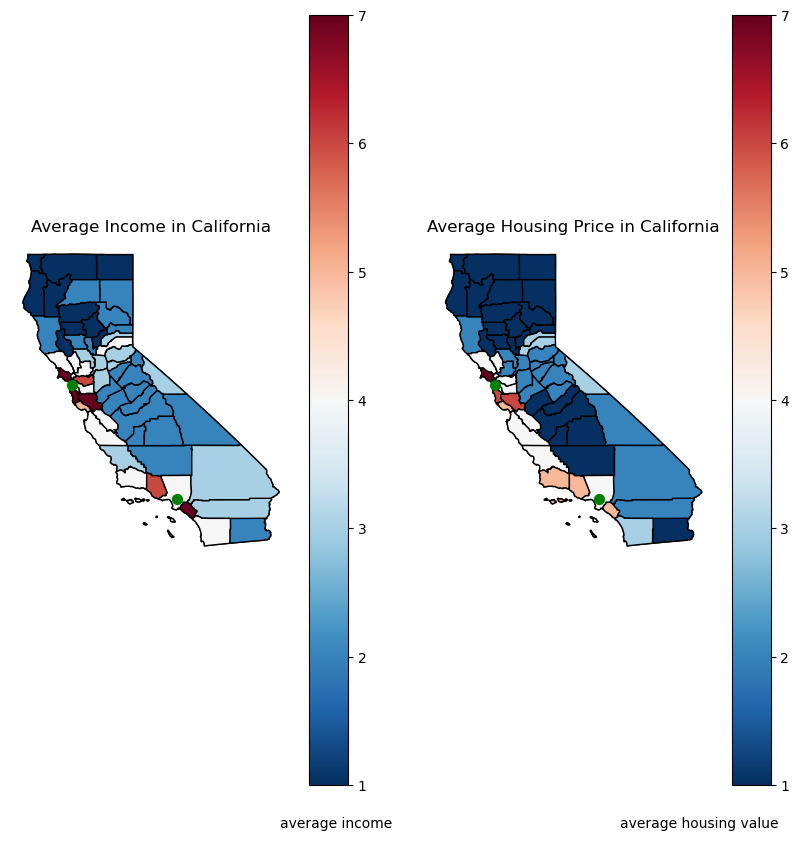

In [484]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax1 = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax1, edgecolor="black", color="white")
ax1.set_title('Average Income in California')
gdf_house_by_county.plot(
    ax=ax1, edgecolor='black', column='income_group', legend=True, cmap='RdBu_r',
    vmin=1, vmax=7)
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax1.annotate('average income',xy=(0.28, 0.04),  xycoords='figure fraction')
ax1.set_axis_off()


ax2 = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax2, edgecolor="black", color="white")
ax2.set_title('Average Housing Price in California')
gdf_house_by_county.plot(
    ax=ax2, edgecolor='black', column='house_group', legend=True, cmap='RdBu_r',
    vmin=1, vmax=7)
lasf.plot(ax=ax2, color='green', alpha=1, marker='o', markersize=50)
ax2.annotate('average housing value', xy=(0.62, 0.04),  xycoords='figure fraction')
ax2.set_axis_off()

plt.show()

From these maps, it is clear that average income and average housing value have a very similar pattern as average income tends to be higher in San Fransisco metropolitan area and Los Angeles metropolitan area and so does average house value. Therefore, we see the same relation between X (income) and Y (housing value) as before. Aside from that, although the tendency of the patterns in the two maps is similar, there is still a difference in how the colours were mapped. I can say that people don’t spend more on the house than they earn more. 

In order to map the counties, we need tuples of coordinates. We generate them by zipping the latitude and longitude together to store them in a new column named coordinates. Then, we turn the tuple into a Shapely Point object. 

# 3. Project Three

## 3.1 Potential Data to Scrape
Through mapping that I did on Project2, I found that there was a correlation between income and average housing prices. In addition to that, as shown in the maps, it seems like the income and housing prices tend to be higher in metropolitan areas. I assume that this happens because income and houses in counties that are the center of metropolitan areas tend to be higher because they are closer to the workplace. To see this relation, I would like to acquire data about the average commute time in each county. If the commute time in counties in the centre of metropolitan areas is longer than that in other counties, the correlation between commute time and housing prices is established, and we can add another element in relation to the location that contributed to the determination of housing prices. 

## 3.2 Potential Challenges
This data I am hoping to scrape is very simple since it shows the average commute time of each county in California, it is possible to scrape it for this project. 

## 3.3 Scraping Data from a Website

I want to acquire the data of the commute time in each county in California through web scrapping from this address. 
https://www.indexmundi.com/facts/united-states/quick-facts/california/average-commute-time#table

In terms of convenience, I assume the counties where the commute is longer has lower house value on average.

First, I am going to request the URL by using requests.get method. Then, I will check the status codes of the response that I received from the webserver and relevant content of the webpage in the obtained response. This content received is the HTML source code of the webpage.

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

commute_web_url = "https://www.indexmundi.com/facts/united-states/quick-facts/california/average-commute-time#table"
response = requests.get(commute_web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:2000])

The response has a status code of 200, which means this is a successful response. Next, I will use a Python library bs4 which parses through HTML content and understands the complete structure of the content. I will pass the response content to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [ ]:
soup_object = BeautifulSoup(response.content)

soup_object

I just explored the schema and understand the structure of the webpage by inspecting the webpage directly on a web browser. In detail, I opened a console window which shows the real time HTML code corresponding to the web content on the website, and identified the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In this case, the data is enclosed in the <div> HTML tag with the class name 'tab_content'. This information can be used to search for the web content directly in our soup object with the find_all() method. This will return a soup object.

In [ ]:
data_table = soup_object.find_all('div', 'tab_content')[2]
data_table

It can be seen that relevant block of data has been extracted but further extraction needs to be done to individually extract the name of the county, the commute time in each county. On further analysis, it can be seen that every row of data is enclosed under a <tr> HTML tag which means table row. All these row values can be extracted into a list of values by finding the <tr> values from our newly created soup object data_table.

In [ ]:
all_values = data_table.find_all('tr')
all_values[:3]

The first element of the list contains the column names 'County, and Value'. The next elements of the list contain soup objects which contain the county data including the name of each county and the commute time. This data can be extracted in a loop since the structure for all the list elements is the same. Now, I am going to make a data frame based on the information I get from web scraping. 

-	An empty dataframe commute_df is created with the column names county and time. 
-	The index is initiated to zero
-	A for loop is designed to go through all the elements of the list in order and extract the county and time from the list element which are enclosed in the <td> HTML tag. A find_all() will return a list of td tags.
-	The .text attribute can be used to just pick the text part from the tag. In our case this is the county and time. 
-	These values are then put into the data frame and the index value is incremented


In [ ]:
commute_df = pd.DataFrame(columns = ['name', 'time']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text
    time = values[1].text
    
    commute_df.loc[ix] = [name, time]# Store it in the dataframe as a row
    ix += 1
    
commute_df = commute_df.replace(r'\n','',regex =True)

# Print the first 5 rows of the dataframe
commute_df.head()

I will merge this new dataset with the existing county-level dataset. 

In [ ]:
# rename the column 'Name' to 'name 
colnames = {'NAME': 'name'}
gdf_house_by_county = gdf_house_by_county.rename(columns=colnames)
gdf_house_by_county.head()

In [ ]:
# merge the two datasets
house_commute =  pd.merge(gdf_house_by_county, commute_df, on = 'name')
house_commute ['time'] = house_commute ['time'].astype(float) #convert the value of 'time' into number 
house_commute.head()

In [ ]:
len(house_commute)

My county-level dataset has 58 observations and after merging, it is still 58, since California has 58 counties. 

## 3.5 Visualizing the Scraped Dataset

Now, I am going to see if there really is a negative correlation between commute time and housing value. First, I am going to make a scatter plot to see the relationship between commute time and housing value. 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax = ax
sns.regplot(x=house_commute["time"], y=house_commute["median_house_value"], scatter_kws={"s": 5}, line_kws={'color': 'red'}, ax=ax)
ax.set_title('Relation between Commute Time and House Value')
ax.set_ylim(50000, 360000)
ax.set_xlabel('commute time', fontsize = 10)
ax.set_ylabel('median house value', fontsize = 10);


This graph suggests there is a positive correlation between commute time and housing value, which is the opposite of what I expected. Next, I am going to create two maps, one is for commute time in each county in California, and the other is for house value, to see if there is a similarity or difference in pattern.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax1 = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax1, edgecolor="black", color="white")
ax1.set_title('Average Commute Time')
house_commute.plot(
    ax=ax1, edgecolor='black', column='time', legend=True, cmap='RdBu_r',
    vmin=14, vmax=38)
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax1.annotate('average commute time', xy=(0.28, 0.04),  xycoords='figure fraction')
ax1.set_axis_off()


ax2 = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax2, edgecolor="black", color="white")
ax2.set_title('Average House Value')
house_commute.plot(
    ax=ax2, edgecolor='black', column='median_house_value', legend=True, cmap='RdBu_r',
    vmin=50000, vmax=360000)
lasf.plot(ax=ax2, color='green', alpha=1, marker='o', markersize=50)
ax2.annotate('average housing value', xy=(0.66, 0.04),  xycoords='figure fraction')
ax2.set_axis_off()

plt.show()

When looking at the map of average commute time, it is clear that counties around San Fransisco metropolitan area and Los Angeles metropolitan area. It is quite surprising that the commuting time is still long in counties that are at the centre of metropolitan areas. when comparing this with the map of average housing prices, the similarity is that the commute time is high and the house value is high in the centre of the metropolitan areas. The difference is that though the average house value gets lower outside of the centre of the metropolitan areas, the average commute time is very high outside of them. 
From these facts, it can be understood that housing prices tend to be higher around large cities, and are not affected by commute time. 

## 3.6 Adding a New Dataset

After analyzing the relationship between commute time and house value, it was understood that the correlation between commute time and house value is not significant. However, since income and housing prices are higher in large cities, I still assume that there is some relationship between house value and urban areas. In order to dig into that, I would like to classify each county depending on the urban-rural classification, and the degree of urbanism in each county has an influence on its house value. 

The data I am going to use is the dataset of rural classifications in California from Economic Research Service in U.S. Department of Agriculture. 

In [474]:
#read the excel file
urban_rural = pd.read_excel('code93.xls')
urban_rural.head()

,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
0,1001,AL,AUTAUGA COUNTY,2
1,1003,AL,BALDWIN COUNTY,2
2,1005,AL,BARBOUR COUNTY,6
3,1007,AL,BIBB COUNTY,6
4,1009,AL,BLOUNT COUNTY,2


In [475]:
#remove data from other states
urban_rural = urban_rural[urban_rural["State"] == " CA"]
urban_rural.head()

,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
183,6001,CA,ALAMEDA COUNTY,0
184,6003,CA,ALPINE COUNTY,9
185,6005,CA,AMADOR COUNTY,6
186,6007,CA,BUTTE COUNTY,3
187,6009,CA,CALAVERAS COUNTY,6


In [476]:
urban_rural['County Name'] = urban_rural['County Name'].str.replace('COUNTY\s', '')
urban_rural['County Name'] = urban_rural['County Name'].str.replace('\s+', '')
urban_rural['County Name'] = urban_rural['County Name'].str.title()
urban_rural['FIPS Code'] = urban_rural['FIPS Code'].astype(str).str[1:]
urban_rural.head()

/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_47507/476676779.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  urban_rural['County Name'] = urban_rural['County Name'].str.replace('COUNTY\s', '')
/var/folders/55/brpy668555v2g85xq7r403mm0000gn/T/ipykernel_47507/476676779.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  urban_rural['County Name'] = urban_rural['County Name'].str.replace('\s+', '')


,FIPS Code,State,County Name,"Rural-urban Continuuum Code, 1993"
183,001,CA,Alameda,0
184,003,CA,Alpine,9
185,005,CA,Amador,6
186,007,CA,Butte,3
187,009,CA,Calaveras,6


In [477]:
#rename some columns for the merge 
new_name = {'FIPS Code': 'COUNTYFP',
           'Rural-urban Continuuum Code, 1993': 'Rural_Urban'}

urban_rural = urban_rural.rename(columns = new_name)
urban_rural.head()

,COUNTYFP,State,County Name,Rural_Urban
183,001,CA,Alameda,0
184,003,CA,Alpine,9
185,005,CA,Amador,6
186,007,CA,Butte,3
187,009,CA,Calaveras,6


Now that I finished the new dataset, I am going to merge it with the county-level dataset. 

In [478]:
houcom_urbru =  pd.merge(house_commute, urban_rural, on = 'COUNTYFP')
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,STATEFP,GEOID,name,geometry,income_group,house_group,time,State,County Name,Rural_Urban
0,001,208469.883053,3.836845,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",4,4,33.4,CA,Alameda,0
1,003,118700.000000,2.613900,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",2,2,21.6,CA,Alpine,9
2,005,117146.428571,3.106507,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",3,2,31.6,CA,Amador,6
3,007,89611.538462,2.335322,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",1,1,21.0,CA,Butte,3
4,009,107893.750000,2.814556,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",2,2,37.9,CA,Calaveras,6


As for classification, the number 0 to 3 means the counties are metro areas, and 4 to 9 mean they are non-metro areas. Within two groups, the higher the number is the more urban the county is. 

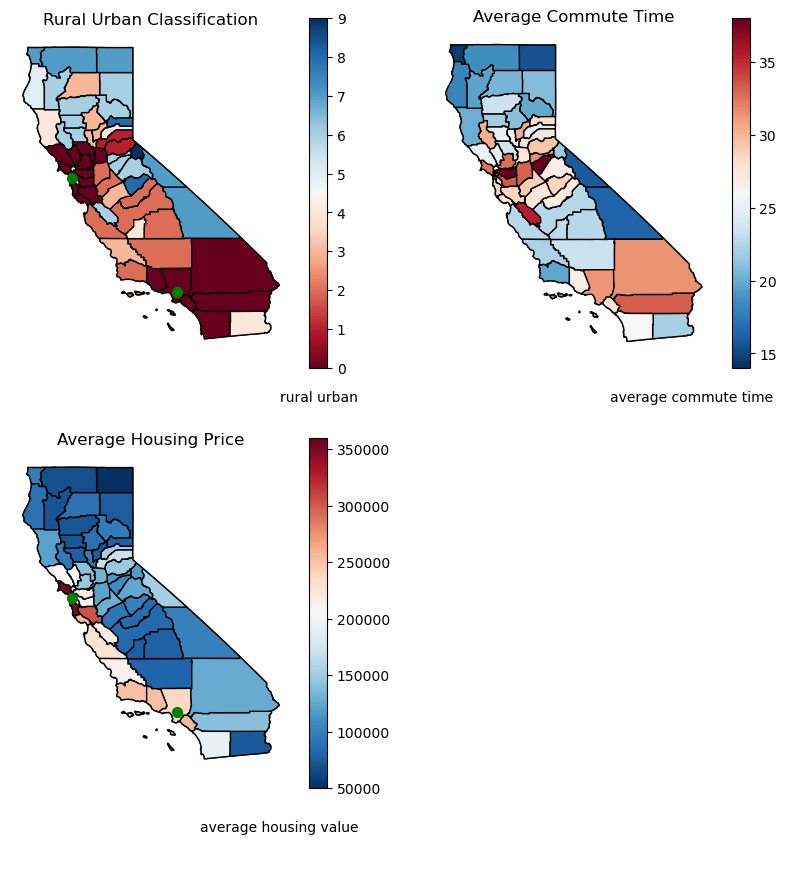

In [479]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes[0,0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Rural Urban Classification')
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='Rural_Urban', legend=True, cmap='RdBu',
    vmin=0, vmax=9)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.annotate('rural urban', xy=(0.28, 0.47),  xycoords='figure fraction')
ax.set_axis_off()

ax = axes[0,1]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Average Commute Time')
house_commute.plot(
    ax=ax, edgecolor='black', column='time', legend=True, cmap='RdBu_r',
    vmin=14, vmax=38)
lasf.plot(ax=ax1, color='green', alpha=1, marker='o', markersize=50)
ax.annotate('average commute time', xy=(0.61, 0.47),  xycoords='figure fraction')
ax.set_axis_off()

ax = axes[1,0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
ax.set_title('Average Housing Price')
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='median_house_value', legend=True, cmap='RdBu_r',
    vmin=50000, vmax=360000)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.annotate('average housing value', xy=(0.2, 0.04),  xycoords='figure fraction')
ax.set_axis_off()

ax = axes[1,1]
ax.set_axis_off()

plt.show()

The result is very similar to when we compared the pattern of commute time and average housing price. Again, the difference is that though the average house value gets lower outside of the centre of the metropolitan areas, the counties that are classified as most urban cover wider places areas that could cover up the whole metropolitan areas. It is expected that most urban areas are the places in the metropolitan areas where people commute to large cites, and therefore the commute time in the commute time is long in such areas, whereas people in rural areas don’t commute to cities and therefore don’t take a long time for the commute. And despite that, it doesn’t have much influence on house prices. 

Although I couldn’t see a clear correlation between urban-rural classification and house value, I decided to make broader subgroups to see the relationship more, since there is still a potential it is correlated. Although I couldn’t see a clear correlation between urban-rural classification and house value, I decided to make broader subgroups to see the relationship more, since there is still a potential it is correlated. I made new columns that show if the county is in a metro area or not and if the average house value in the county is higher than the median or not. 

In [480]:
median_i = houcom_urbru['median_house_value'].median()
houcom_urbru.loc[houcom_urbru['median_house_value'] >= median_i, 'house_HL'] = 'High'
houcom_urbru.loc[houcom_urbru['median_house_value'] < median_i, 'house_HL'] = 'Low'
houcom_urbru.loc[houcom_urbru['Rural_Urban'] <= 3, 'Metro'] = 'Metro'
houcom_urbru.loc[houcom_urbru['Rural_Urban'] > 3, 'Metro'] = 'NonMetro'
houcom_urbru.head()

,COUNTYFP,median_house_value,median_income,STATEFP,GEOID,name,geometry,income_group,house_group,time,State,County Name,Rural_Urban,house_HL,Metro
0,001,208469.883053,3.836845,06,06001,Alameda,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",4,4,33.4,CA,Alameda,0,High,Metro
1,003,118700.000000,2.613900,06,06003,Alpine,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",2,2,21.6,CA,Alpine,9,Low,NonMetro
2,005,117146.428571,3.106507,06,06005,Amador,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",3,2,31.6,CA,Amador,6,Low,NonMetro
3,007,89611.538462,2.335322,06,06007,Butte,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",1,1,21.0,CA,Butte,3,Low,Metro
4,009,107893.750000,2.814556,06,06009,Calaveras,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",2,2,37.9,CA,Calaveras,6,Low,NonMetro


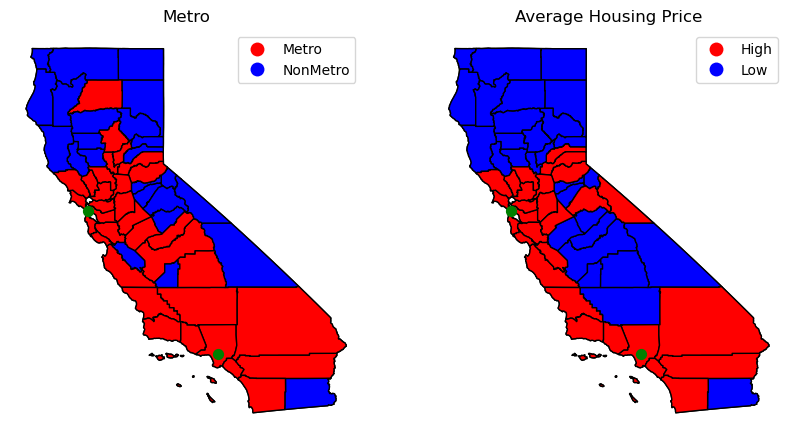

In [481]:
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax = axes[0]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
cmap = ListedColormap(['red', 'blue'])
houcom_urbru.plot(ax=ax, edgecolor='black', column='Metro', legend=True, cmap=cmap)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_title('Metro')
ax.set_axis_off()


ax = axes[1]
state_df.query("NAME == 'California'").plot(ax=ax, edgecolor="black", color="white")
cmap = ListedColormap(['red', 'blue'])
ax.set_title('Average Housing Price')
houcom_urbru.plot(
    ax=ax, edgecolor='black', column='house_HL', legend=True, cmap=cmap)
lasf.plot(ax=ax, color='green', alpha=1, marker='o', markersize=50)
ax.set_axis_off()

plt.show()

Comparing these two maps, it is clear that the colour pattern of the two is similar to each other. From this fact, it can be said that the housing price is affected by whether the place is within a metropolitan area or not. 

## Conclusion

I looked at how income, population, and ocean proximity affect house value. Through project 1 and project 2, I found that there are significant positive correlations between income and house value and between ocean proximity and house value. I did not see a correlation between population and house value. In project 3, I focused on how house value is different in different places in relation to metropolitan areas and used commute time and urban-rural classification as indicators to see it. Even though the relationships between house value and the two indicators were not clear, I found there was a potential correlation between metro areas and house value and house value. 

The difficulties I faced through this project is that most of the useful information was on a county level, so it was difficult to make the most of the original dataset that is a block level. For example, the commute time in counties in the centre of metropolitan areas is long and therefore we could not see a negative correlation between commute time and house price. If it was conducted on a block level, I would be able to see the relationship within the counties with more observations and therefore could see the correlation between those two. 

In order to cope well with upcoming challenges, I will try to focus on the block-level dataset and find block-level data so that I will be able to do OLS analysis in the next project. 
